<a href="https://colab.research.google.com/github/shyammarjit/winter-internship-at-iiit-Alahabad/blob/main/regularization_and_without_regularization_comparazion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation

"""
Dummy Data for Linear Regression
"""
data = [(1, 1), (2, 2), (5, 5.5), (6, 8), (9, 10)]    

"""
Plot the line using theta_values
"""
def plot_line(formula, x_range, order_of_regression, label=None):
    x = np.array(x_range).tolist()  
    y = [formula(update_features(x_i, order_of_regression, 9)) for x_i in x]
    l, = plt.plot(x, y, label=label)
    return l

In [ ]:
"""
Hypothesis Function
"""
def h(x, theta):
    return np.matmul(theta.T, x)[0][0]

"""
Partial Derivative w.r.t. theta_i
"""
def j_prime_theta(data, theta, order_of_regression, i):
    result = 0
    m = len(data)
    for x, y in data :
        x = update_features(x, order_of_regression)
        result += (h(x, theta) - y) * x[i]
    
    return (1/m) * result

"""
Update features by order of the regression
"""

def update_features(x, order_of_regression, m = 9):
    features = [1]
    for i in range(order_of_regression):
        features.append(math.pow(x, i+1)/ math.pow(m, i+1))
    return np.atleast_2d(features).T

"""
Cost Function
"""
def j(data, theta, order_of_regression):
    cost = 0
    m = len(data)
    for x, y in data:
        x = update_features(x, order_of_regression)
        cost += math.pow(h(x, theta) - y, 2)
    return (1/(2*m)) * cost

"""
Simultaneous Update
"""
def update_theta(data, alpha, theta, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * j_prime_theta(data, theta, order_of_regression, i))
    theta = np.array(temp)
    return theta
    
"""
Gradient Descent For Multivariate Regression
def gradient_descent(data, alpha, tolerance, theta=[], order_of_regression = 2):
    if len(theta) == 0:
        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T
    prev_j = 10000
    curr_j = j(data, theta, order_of_regression)
    print(curr_j)
    cost_history = []
    theta_history = [] 
    counter = 0
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_history.append(theta)
            theta = update_theta(data, alpha, theta, order_of_regression)
            prev_j = curr_j
            curr_j = j(data, theta, order_of_regression)
            if counter % 100 == 0:
                print(curr_j)
            counter += 1
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta, cost_history, theta_history

theta, cost_history, theta_history = gradient_descent(data, 0.01, 0.0001, order_of_regression=150)
"""

'\nGradient Descent For Multivariate Regression\ndef gradient_descent(data, alpha, tolerance, theta=[], order_of_regression = 2):\n    if len(theta) == 0:\n        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T\n    prev_j = 10000\n    curr_j = j(data, theta, order_of_regression)\n    print(curr_j)\n    cost_history = []\n    theta_history = [] \n    counter = 0\n    while(abs(curr_j - prev_j) > tolerance):\n        try:\n            cost_history.append(curr_j)\n            theta_history.append(theta)\n            theta = update_theta(data, alpha, theta, order_of_regression)\n            prev_j = curr_j\n            curr_j = j(data, theta, order_of_regression)\n            if counter % 100 == 0:\n                print(curr_j)\n            counter += 1\n        except:\n            break\n    print("Stopped with Error at %.5f" % prev_j)\n    return theta, cost_history, theta_history\n\ntheta, cost_history, theta_history = gradient_descent(data, 0.01, 0.0001, orde

In [ ]:
"""
Regularized Version
"""
def reg_j_prime_theta(data, theta, l, order_of_regression, i):
    result = 0
    m = len(data)
    for x, y in data :
        x = update_features(x, order_of_regression)
        result += (h(x, theta) - y) * x[i]
    result += l*theta[i]
    return (1/m) * result

def reg_j(data, theta, l, order_of_regression):
    cost = 0
    m = len(data)
    for x, y in data:
        x = update_features(x, order_of_regression)
        cost += math.pow(h(x, theta) - y, 2)
    reg = 0
    for j in theta:
        reg += math.pow(j, 2)
    reg = reg * l
    return (1/(2*m)) * (cost + reg)

def reg_update_theta(data, alpha, theta, l, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * reg_j_prime_theta(data, theta, l, order_of_regression, i))
    theta = np.array(temp)
    return theta

def reg_gradient_descent(data, alpha, l, tolerance, theta=[], order_of_regression = 2):
    if len(theta) == 0:
        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T
    prev_j = 10000
    curr_j = reg_j(data, theta, l, order_of_regression)
    print(curr_j)
    cost_history = []
    theta_history = [] 
    counter = 0
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_history.append(theta)
            theta = reg_update_theta(data, alpha, theta, l, order_of_regression)
            prev_j = curr_j
            curr_j = reg_j(data, theta, l, order_of_regression)
            if counter % 100 == 0:
                print(curr_j)
            counter += 1
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta, cost_history, theta_history
reg_theta, reg_cost_history, reg_theta_history = reg_gradient_descent(data, 0.01, 1, 0.0001, order_of_regression=150)
print("*************")
print(reg_theta)

5060465.9944289895
2455813.9044681364
7905.034230643517
5288.177319873552
3538.830287312372
2368.963237227495
1586.4134696426845
1062.8329649033778
712.454005996554
477.9421656008641
320.9585415818075
215.85954478815484
145.4890972605444
98.36713407124414
66.8103775436051
45.67584900798573
31.520522132956316
22.039158162839414
15.688156591344516
11.433824190524764
8.583881811878104
6.674669749607161
5.395630342489859
4.53874283121364
3.964662719710697
3.5800454040685965
3.3223588242485427
3.149711228519235
3.0340376224883365
2.9565357202677016
2.904608601589631
2.8698166037751416
2.846505257415218
2.830886092155777
Stopped with Error at 2.82411
*************
[[ 2.11397579e+00]
 [ 2.35533435e+00]
 [ 1.69976820e+00]
 [ 1.10017817e+00]
 [ 6.94526219e-01]
 [ 5.00875041e-01]
 [ 3.08908394e-01]
 [ 1.73158328e-01]
 [ 1.21633432e-01]
 [ 6.01854425e-02]
 [ 5.46737319e-02]
 [ 1.04939828e-01]
 [ 1.31489772e-02]
 [ 8.40897990e-02]
 [ 1.60177490e-02]
 [-1.04262189e-02]
 [-4.48801710e-02]
 [ 4.89194

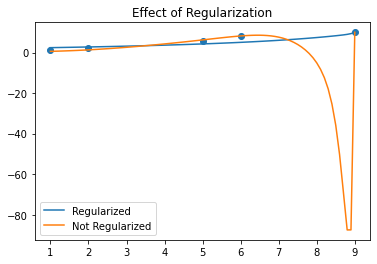

In [ ]:
f = functools.partial(h, theta=reg_theta_history[-1])
plt.scatter([i[0] for i in data], [i[1] for i in data])
reg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=150, label='regularized')
f = functools.partial(h, theta=theta_history[-1])
unreg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=150, label='not regularized')
plt.legend([reg, unreg], ['Regularized', 'Not Regularized'])
plt.title('Effect of Regularization')
plt.show()

In [ ]:
update_features(9,2)

array([[1.],
       [1.],
       [1.]])

NameError: ignored

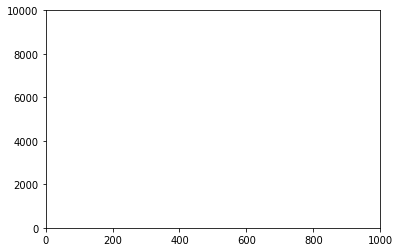

In [ ]:

fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 10000)
b,=plt.plot(range(len(cost_history_01)), cost_history_01, label='alpha=0.01')
c,=plt.plot(range(len(cost_history_001)), cost_history_001, label='alpha=0.001')
d,=plt.plot(range(len(cost_history_0001)), cost_history_0001, label='alpha=0.0001')
e,=plt.plot(range(len(cost_history_00001)), cost_history_00001 ,label='alpha=0.00001')
plt.legend(handles=[b, c, d, e])
plt.title("Effect of learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 5000)
ax.set_ylim(0, 6000)
plt.plot(range(len(cost_history)), cost_history)
# plt.title("Optimum learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

In [ ]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True, label='h(x)')
plt.title('Parameter Optimization with Feature scaling')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[ln])
    return ln,

def update(frame):
    theta = frame
    x = (np.array(range(10, 91))/10).tolist()
    f = functools.partial(h, theta=theta)
    y = [f(update_features(x_i, 100)) for x_i in x]
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i in theta_history[::100]:
        yield i

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

In [ ]:
len(theta_history)

In [ ]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True)
plt.title('Hypothesis Parameter Optimization for Linear Regression')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    return ln,

def update(frame):
    theta_0 = frame[0]
    theta_1 = frame[1]
    x = np.array(range(10))
    f = functools.partial(h, theta_0=theta_0, theta_1=theta_1)
    y = f(x)
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i, j in zip(theta_0_history[::300], theta_1_history[::300]):
        yield i, j

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

In [ ]:
plt.show()